# Exercies 6.13 
### Introduction
b) Solve $5e^{-x} + x - 5 =0 $ for x using binary method

c) With $\lambda = 502 nm$, solve for $T$ with $\lambda = {b \over T}$

In [6]:
import numpy as np
def dip(x):
    return 5*np.exp(-x)+x-5

#Part B
x1 = 3
x2 = 10
xmid = (x1+x2)/2
counter = 0
while abs(dip(xmid)) > 1e-6:
    if np.sign(dip(xmid))== np.sign(dip(x1)):
        x1 = xmid
    else:
        x2 = xmid
    xmid = (x1 + x2) / 2
    counter +=1
    if counter > 10000:
        print('Uh Oh')
        break
b = xmid
print(f'The displacement constant is {b:.8f}')

# Part C
λ = 502e-9
b = b
T = b/λ
print(f'The surface temperature of the Sun is {T:.0f} K')

The displacement constant is 4.96511507
The surface temperature of the Sun is 9890667 K


### Conclusion 
I have done something like this before. I think it is a really fun way to find roots. I made the while statement be < at first and that was obviously wrong. 

# In Class 5/30/2023 - 6.9
### Introduction
Went over a lot of stuff in class. This goes over asymmetric quantum well calculations

[ 5.83912159 11.19302258 19.02520016]
0 9.355440612663033e-19
1 1.7933460779584115e-18
2 3.0482175696150243e-18


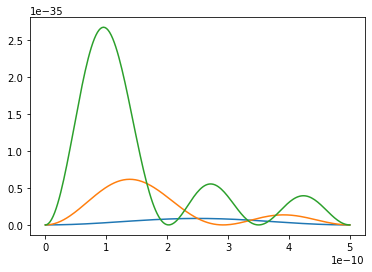

In [73]:
from numpy.linalg import eig, eigh,eigvals,eigvalsh
from numpy import array, pi, empty, sin, linspace
from scipy.constants import hbar

# Part A done in class

#Part B
def Hmn(m,n):
    if m == n:  # on diagonal 
        return (2*a/L/L)*L*L/4 + m*m*pi*pi*hbar*hbar/2/M/L/L
    elif (m+n)%2 == 0:  # both even or both odd
        return 0
    return -(2*a/L/L)*(2*L/pi)**2*n*m/(m*m-n*n)**2
    

 #Constants
N = 3  # array size
L = 5e-10
e = 1.6022e-19
a = 10*e
M = 9.1094e-31

H = empty([N,N])
for i in range(N):
    for j in range(N):
        H[i,j]=Hmn(i+1,j+1)
        
EeV = eigvalsh(H)/e
print(EeV)

def phi(n,x):
    return sin(n*pi*x/L)

phiP = 0
Eprime, V = eigh(H)
x = linspace(0,L,200)
for num,E in enumerate(Eprime):
    print(num, E)
    phiP += E*phi(num+1,x)
    plt.plot(x,abs(phiP)**2)
    


### Conclusion
I have no idea if this is right. I tried hard and they are definitely asymmetrical. 

# Exercise 6.15
### Introduction
$$ P(x) = 924x^6 -2772x^5 + 3150x^4 - 1680x^3 + 420x^2 - 42x + 1$$
a) Plot it and guess the roots

b) Use Newton's method to find 6 roots to 10 decimal accuracy. 

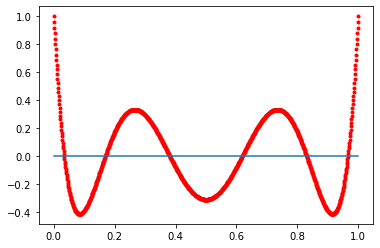

[0.033765242898377276, 0.16939530676661566, 0.38069040695839995, 0.6193095930415915, 0.830604693233137, 0.966234757101586]


In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Part A
def P(x):
    return 924*x**6 - 2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1

x = np.linspace(0,1,1000)
plt.plot(x,P(x),'r.')
plt.plot(x,np.zeros_like(x))
plt.show()

# Part B
# Derivative of P
def p(x):
    return 6*924*x**5-2772*5*x**4+3150*4*x**3-1680*3*x**2+420*2*x-42

guesses = [0.02,0.18,0.37,0.61,0.84,0.95]
roots = []
for guess in guesses:
    x = guess
    while abs(P(x)) > 1e-10:
        x = x - P(x)/p(x)
    roots.append(x)
print(roots)

### Conclusion
This was really fun. My biggest problem with Newton's method is that we need good guesses. 